# <center>PREDICTING RAINFALL IN INDIA JUN-SEP

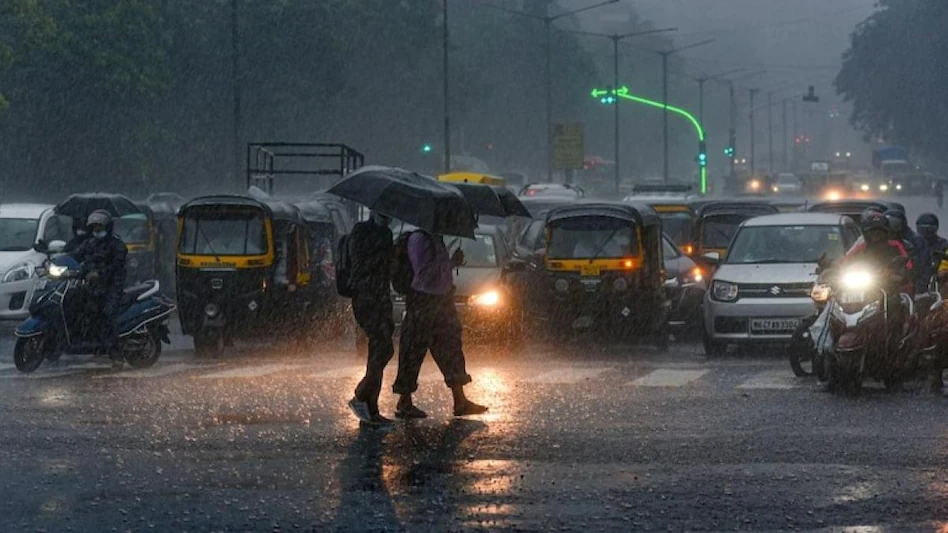

## Usually rainy season in India starts in late May. It occurs due to influence of monsoon winds and last until September. In June showers are at full swing. Cities are literally drowning due to amount of rainfall. Showers usually occur at evening or night and might last for couple hours. Rain is accompanied by lightning and thunder.In general southern part of the country receives more precipitation than northern. Anyway territories are receiving up to 80% of their annual amount of precipitation during rainy season. Beginning of rainy season rolls through country’s territory following routs of the monsoon wind. Therefore it covers whole territory of the country only n first week of July. Intensity and frequency of rains during rainy season varies from year to year.


## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR 
from sklearn.model_selection import cross_val_score

In [2]:
d=pd.read_csv('rainfaLLIndia.csv')
d

,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9
...,...,...,...,...,...,...,...
4327,LAKSHDWEEP,2017,521.9,164.2,206.2,216.0,1108.3
4328,LAKSHDWEEP,2018,203.2,139.7,124.4,74.4,541.7
4329,LAKSHDWEEP,2019,242.5,489.4,338.4,156.7,1227.0
4330,LAKSHDWEEP,2020,265.4,476.2,269.6,334.3,1345.5


## EDA

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subdivision  4332 non-null   object 
 1   YEAR         4332 non-null   int64  
 2   JUN          4332 non-null   float64
 3   JUL          4332 non-null   float64
 4   AUG          4332 non-null   float64
 5   SEP          4332 non-null   float64
 6   JUN-SEP      4332 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 237.0+ KB


In [4]:
d.head()

,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9


In [5]:
d.tail()

,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
4327,LAKSHDWEEP,2017,521.9,164.2,206.2,216.0,1108.3
4328,LAKSHDWEEP,2018,203.2,139.7,124.4,74.4,541.7
4329,LAKSHDWEEP,2019,242.5,489.4,338.4,156.7,1227.0
4330,LAKSHDWEEP,2020,265.4,476.2,269.6,334.3,1345.5
4331,LAKSHDWEEP,2021,160.0,156.5,319.5,154.9,790.9


In [6]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,4332.0,1961.224377,34.869503,1901.0,1931.000,1961.00,1991.000,2021.0
JUN,4332.0,227.582410,232.087633,-99.9,70.400,137.65,303.725,1609.9
JUL,4332.0,344.361657,268.229923,-99.9,173.875,283.25,416.175,2362.8
AUG,4332.0,288.907018,189.930239,-99.9,155.000,258.00,377.625,1664.6
SEP,4332.0,197.399931,136.681781,-99.9,99.875,172.90,266.500,1222.0
JUN-SEP,4332.0,1057.105217,706.555790,-99.9,565.925,877.30,1287.900,4536.9


In [7]:
d.shape

(4332, 7)

In [8]:
d.sample()

,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
2116,EAST RAJASTHAN,1983,72.5,256.6,240.3,128.2,697.6


In [9]:
d.duplicated().sum()

0

In [10]:
d.isnull().mean()*100

subdivision    0.0
YEAR           0.0
JUN            0.0
JUL            0.0
AUG            0.0
SEP            0.0
JUN-SEP        0.0
dtype: float64

## Univariate analysis

### Box plot

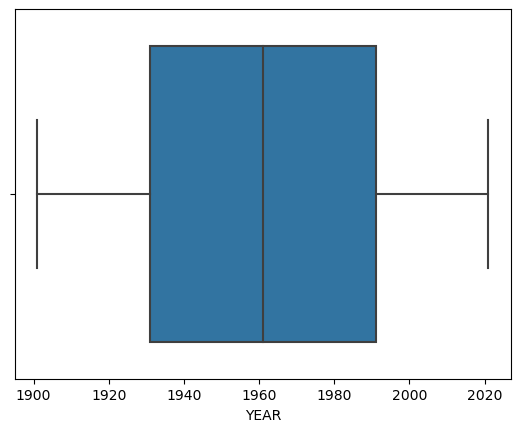

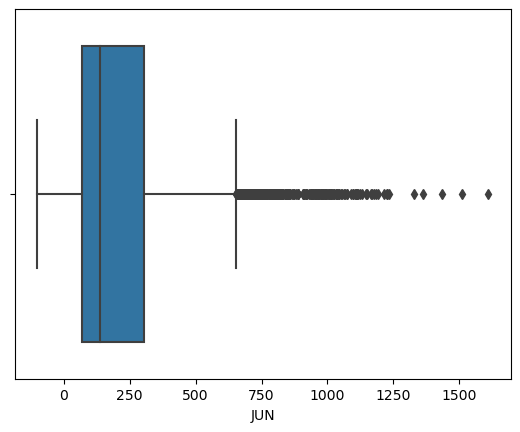

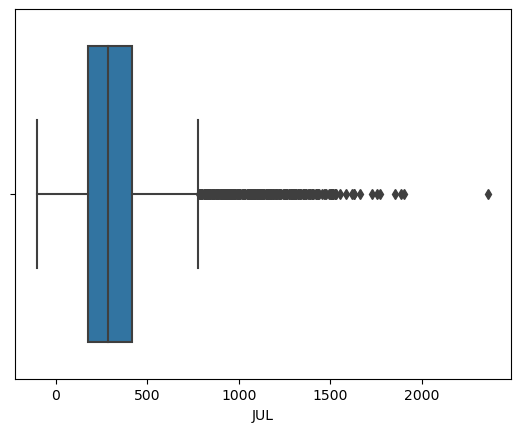

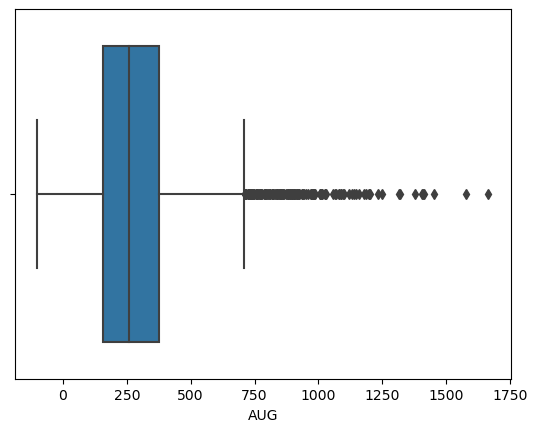

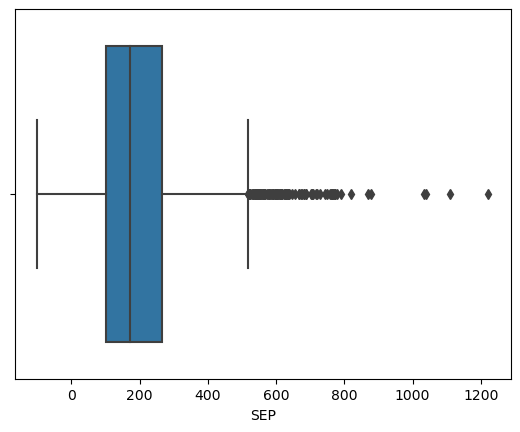

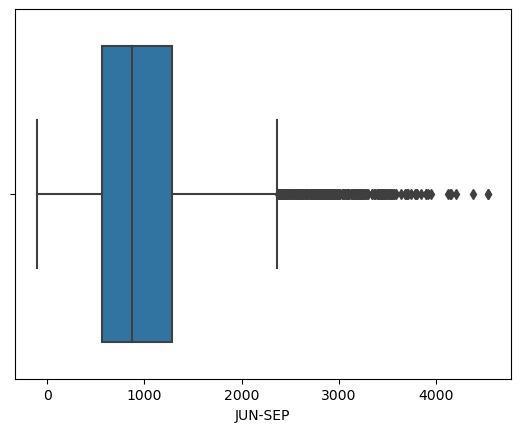

In [11]:
for i in d.columns:
    if d[i].dtypes!='object':
        sns.boxplot(x=d[i])
        plt.show()

### Hist plot

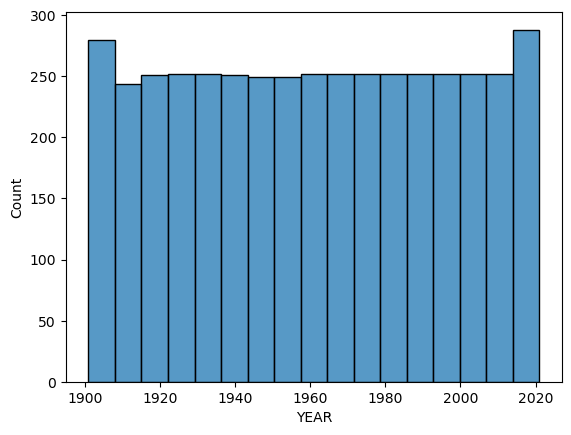

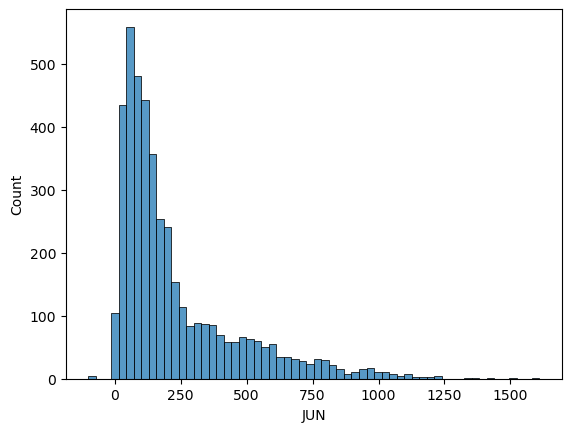

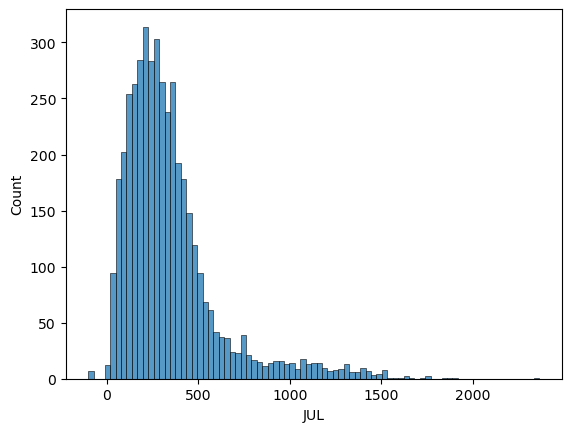

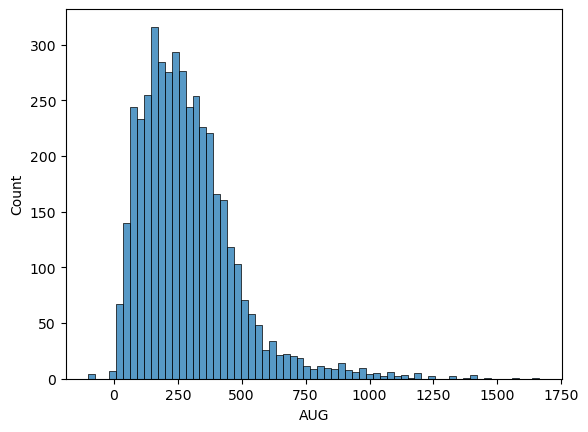

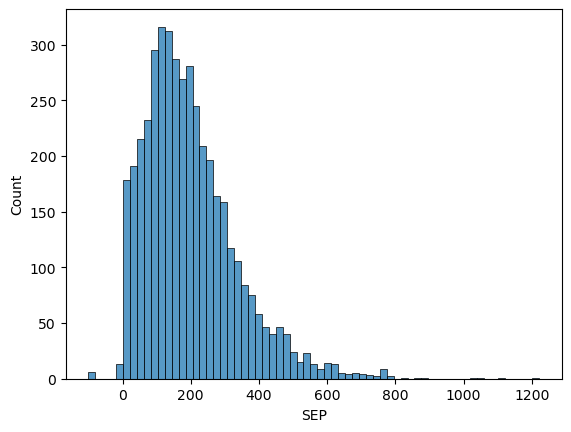

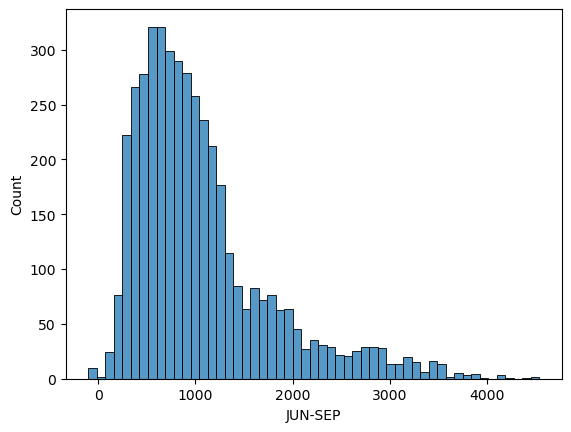

In [12]:
for i in d.columns:
    if d[i].dtypes!='object':
        sns.histplot(x=d[i])
        plt.show()
    

### KDE plot

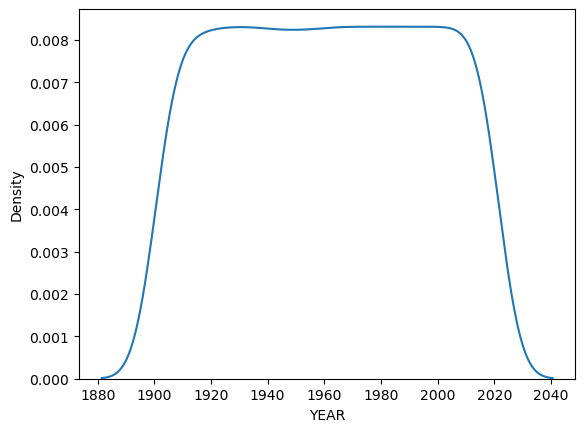

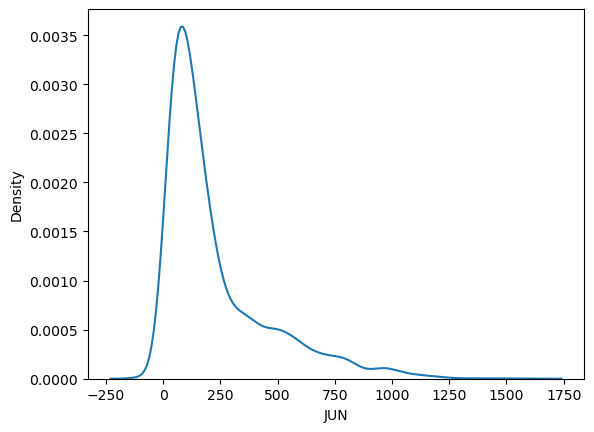

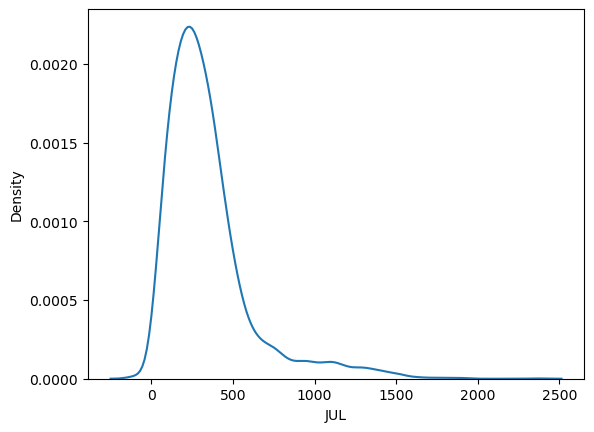

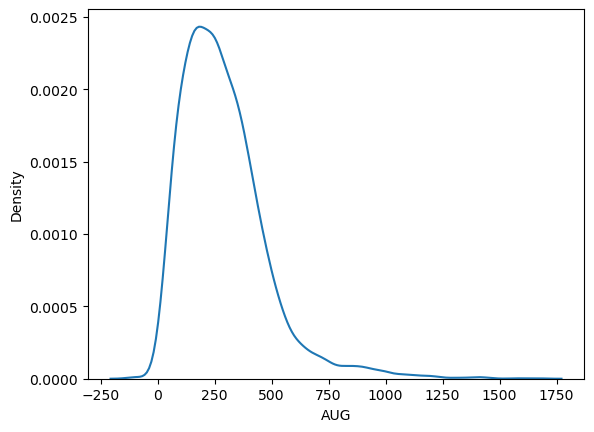

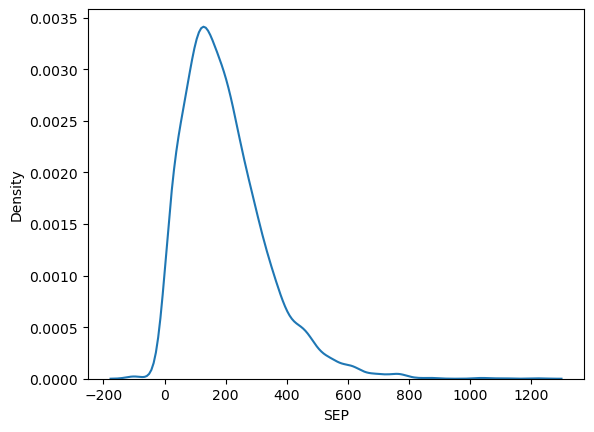

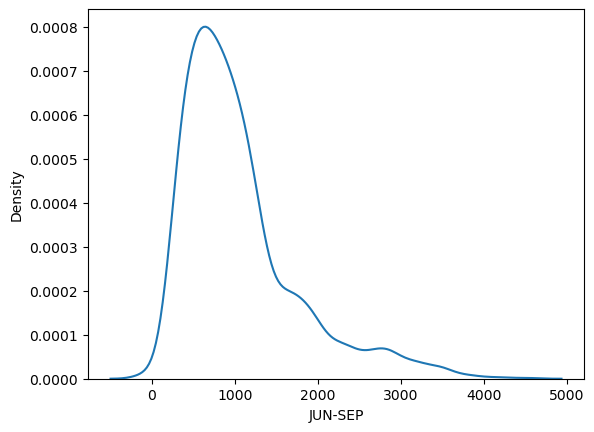

In [13]:
for i in d.columns:
    if d[i].dtypes!='object':
        sns.kdeplot(x=d[i])
        plt.show()

In [14]:
d.columns

Index(['subdivision', 'YEAR', 'JUN', 'JUL', 'AUG', 'SEP', 'JUN-SEP'], dtype='object')

### Violin plot

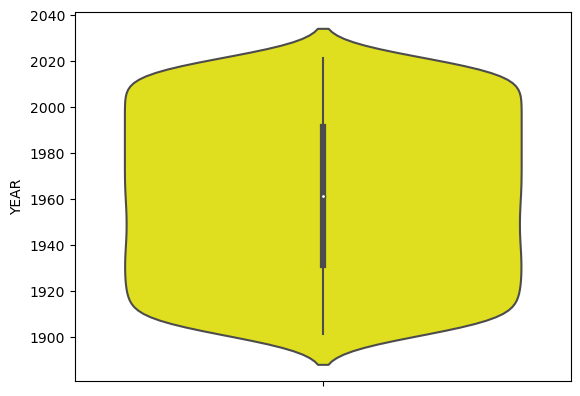

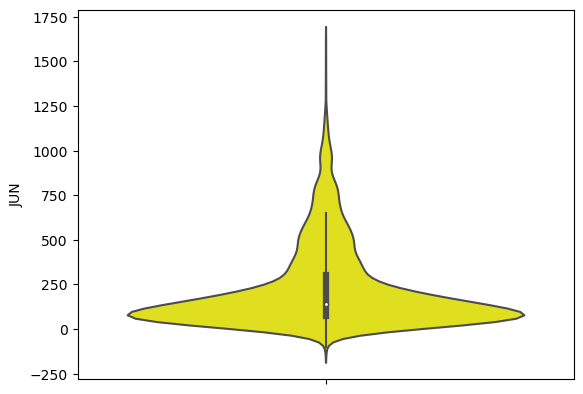

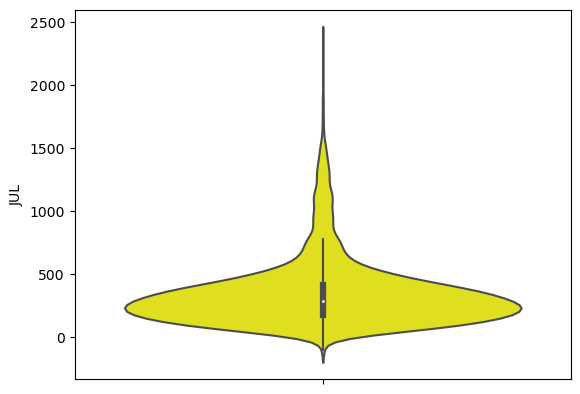

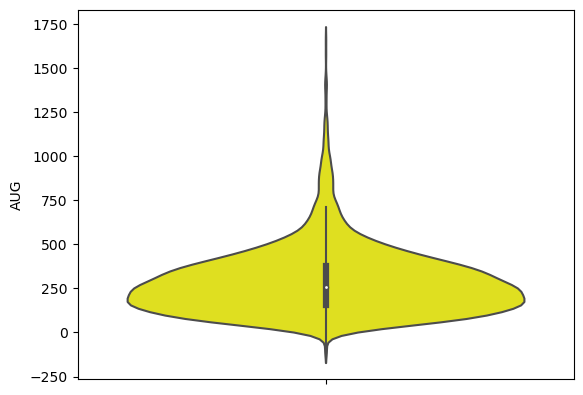

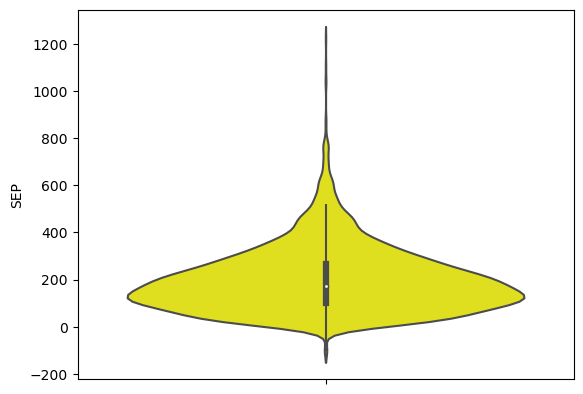

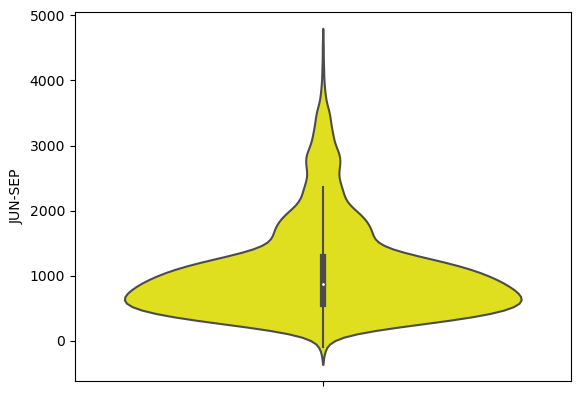

In [15]:
for i in d.columns:
    if d[i].dtype!='object':
        sns.violinplot(y=d[i],color='yellow')
        plt.show();

### Line plot

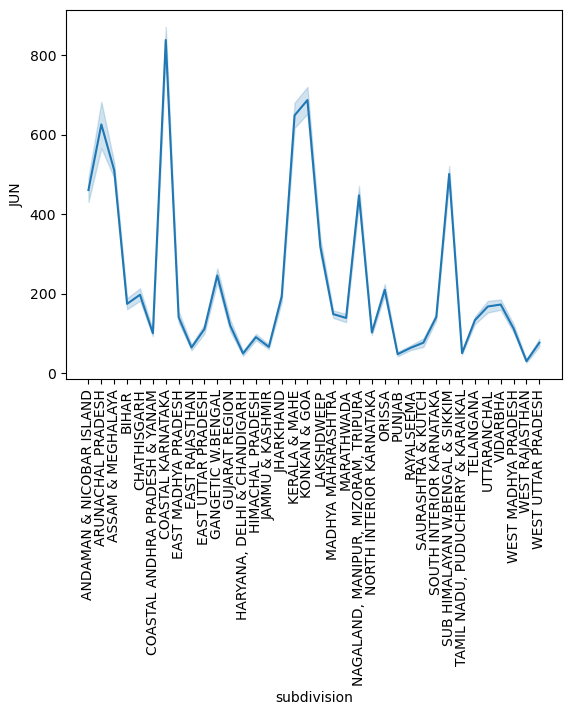

In [16]:
sns.lineplot(x='subdivision', y='JUN', data=d.sort_values(by='subdivision',ascending=True));
plt.xticks(rotation=90)
plt.show()

### Bar plot

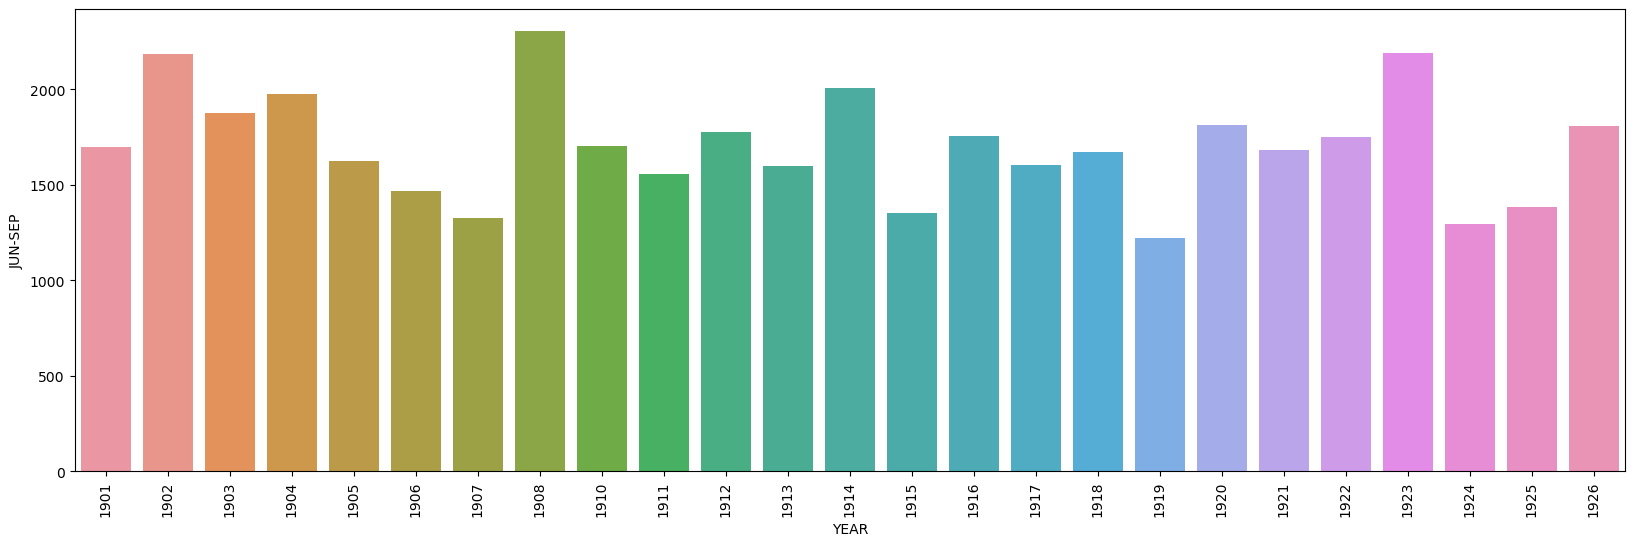

In [17]:
plt.figure(figsize=(20,6))
sns.barplot(x='YEAR',y="JUN-SEP", data=d[:25]);
plt.xticks(rotation=90)
plt.show()

### Histograms

Histograms showing the data from attributes (JUN to SEPTEMBER) of the years 1901-2020:


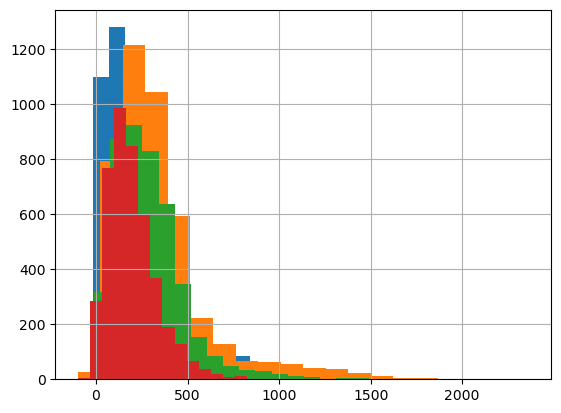

In [18]:
print("Histograms showing the data from attributes (JUN to SEPTEMBER) of the years 1901-2020:")
d['JUN'].hist(bins=20)
d['JUL'].hist(bins=20)
d['AUG'].hist(bins=20)
d['SEP'].hist(bins=20);


## Treating outliers

In [19]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [20]:
for column in d.columns:
    if d[column].dtype !='object':
        UL,LL=outlier_limit(d[column])
        d[column]=np.where((d[column]>UL)|(d[column]<LL),np.nan,d[column])
       

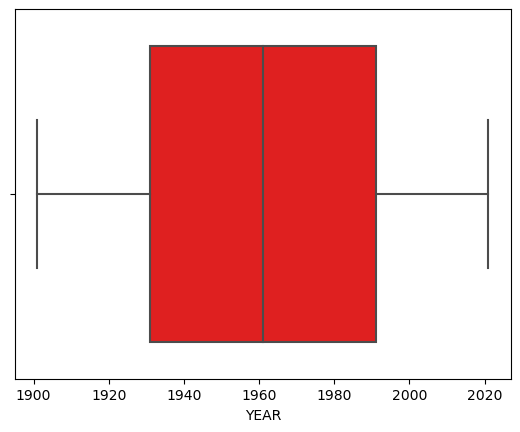

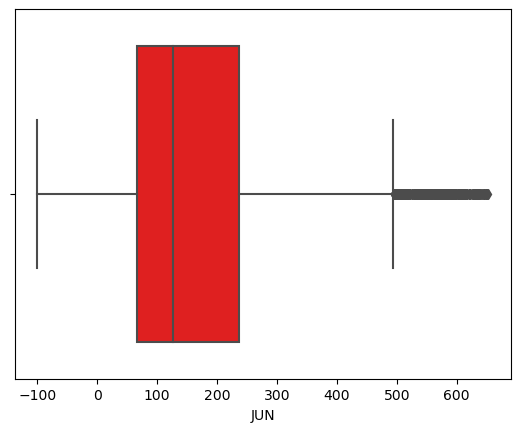

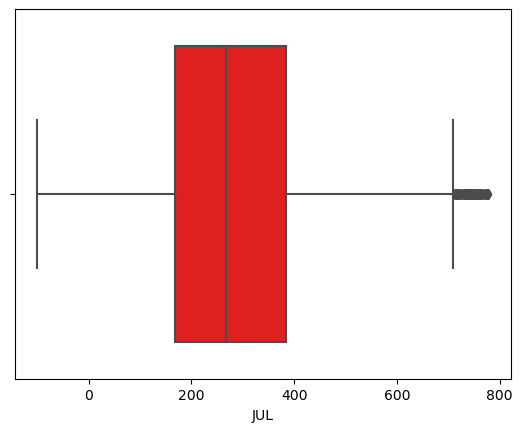

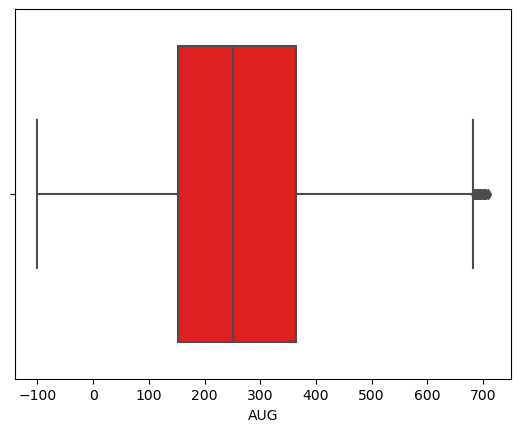

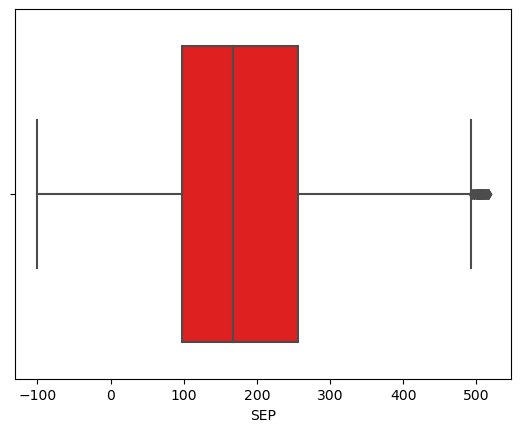

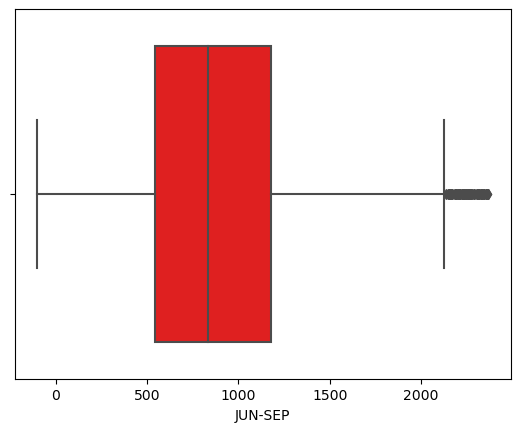

In [21]:
for i in d.columns:
    if d[i].dtypes!='object':
        sns.boxplot(x=d[i],color="red")
        plt.show()

In [22]:
d.dropna(inplace=True)

## Label encoding the categorical columns

In [23]:
le=LabelEncoder()
d['subdivision']=le.fit_transform(d['subdivision'])
d.tail()

,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
4327,18,2017.0,521.9,164.2,206.2,216.0,1108.3
4328,18,2018.0,203.2,139.7,124.4,74.4,541.7
4329,18,2019.0,242.5,489.4,338.4,156.7,1227.0
4330,18,2020.0,265.4,476.2,269.6,334.3,1345.5
4331,18,2021.0,160.0,156.5,319.5,154.9,790.9


In [24]:
d.subdivision.unique()

array([ 0,  1,  2, 21, 28, 10, 23, 15,  3,  9, 35, 31, 12, 24, 13, 14, 34,
        8, 33,  7, 11, 26, 17, 19, 20, 32,  4,  5, 30, 25, 29,  6, 22, 27,
       16, 18])

## Checking the correlation with the target 'JUN-SEP' months.

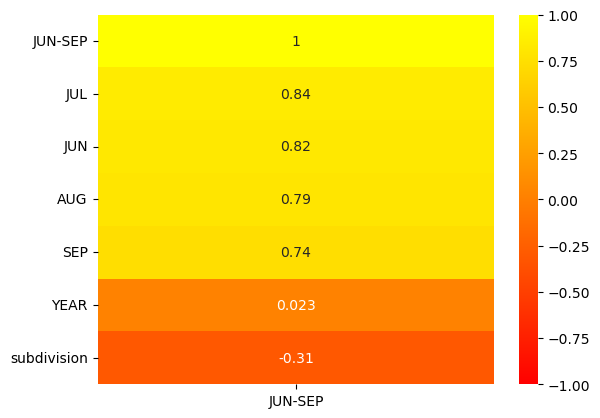

In [25]:
sns.heatmap(d.corr()[['JUN-SEP']].sort_values(by='JUN-SEP', ascending=False),vmin=-1, vmax=1, annot=True,cmap="autumn");

## Lets take only the columns with good correlation with the target

In [26]:
x= d[['JUL','JUN','AUG']].values

In [27]:
y = d[['JUN-SEP']].values

## Feature Scaling

In [28]:
sc=StandardScaler()

In [29]:
x = sc.fit_transform(x)

## Model buliding

In [30]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [31]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  92.75385388019131
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  92.76045413842684
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  103.50392699154406
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  140.41826563233002
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  100.48897209876039
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  132.8380386383605
*************************************************

## Selecting LinearRegression as it is having best metrics

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [33]:
model=LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred=model.predict(x)

In [36]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=('ACTUAL','PREDICTION'),dtype=float)

In [37]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,1696.3,1666.286054
1,1874.0,1866.615209
2,1624.9,1641.957359
3,1327.1,1375.851592
4,1553.6,1373.959705


### scatter plot

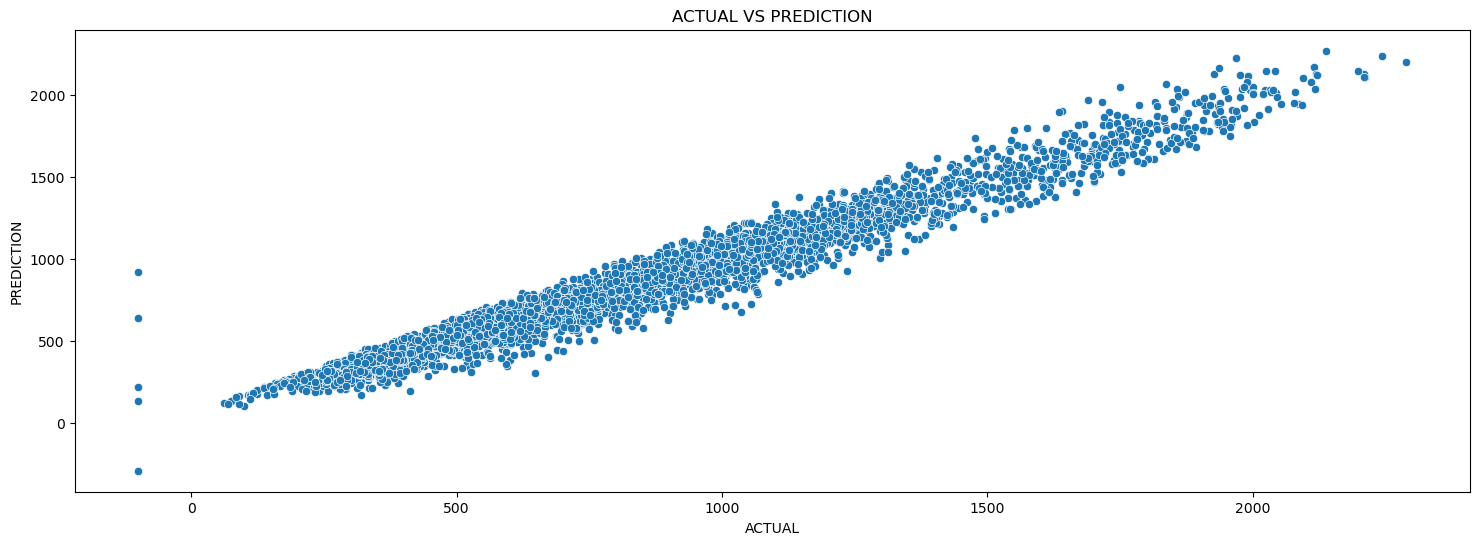

In [38]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");

In [39]:
model.score(x,y)*100

95.58802149960869

### Line plot

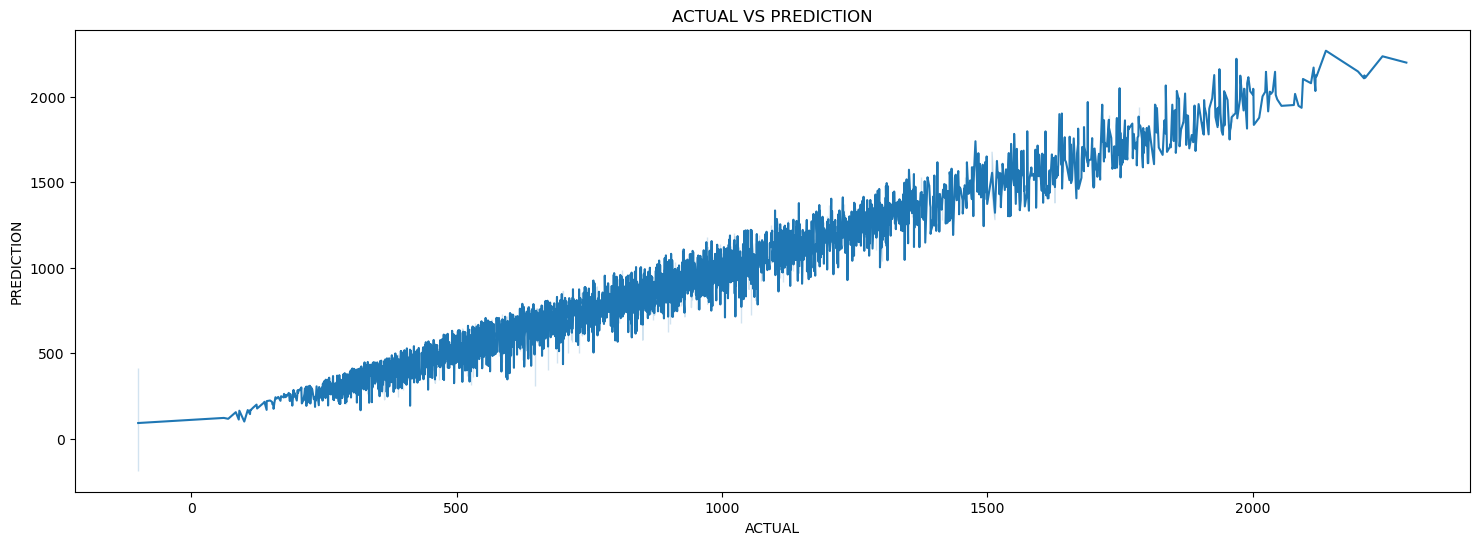

In [40]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.lineplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");